     Survived                                               Name
0           0                            Braund, Mr. Owen Harris
1           1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2           1                             Heikkinen, Miss. Laina
3           1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4           0                           Allen, Mr. William Henry
..        ...                                                ...
886         0                              Montvila, Rev. Juozas
887         1                       Graham, Miss. Margaret Edith
888         0           Johnston, Miss. Catherine Helen "Carrie"
889         1                              Behr, Mr. Karl Howell
890         0                                Dooley, Mr. Patrick

[891 rows x 2 columns]
Logistic Regression Accuracy :  94.01913875598086


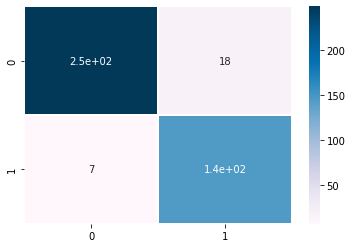

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/content/drive/MyDrive/datasets/titanic/gender_submission.csv")
test_df = pd.read_csv("/content/drive/MyDrive/datasets/titanic/test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/datasets/titanic/train.csv")
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(value=test_df['Age'].mean(), inplace=True)

x_train = train_df.drop(['Survived','Name','Ticket','Embarked','Cabin','Fare'], axis = 1)
y_train = train_df['Survived']
print(train_df[['Survived','Name']])
x_test = test_df.drop(['Name','Ticket','Embarked','Cabin','Fare'],axis=1)
y_test = df['Survived']
model = LogisticRegression(solver="liblinear",multi_class="ovr")
model.fit(x_train, y_train)
predicted_values = model.predict(x_test)
acc_knn = metrics.accuracy_score(y_test, predicted_values)
print("Logistic Regression Accuracy : ",acc_knn*100)
knncm = confusion_matrix(y_test,predicted_values)
sb.heatmap(knncm,annot=True,linewidth=1.0,cmap="PuBu")